In [1]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich
from test_models import LorenzAttractor

In [2]:
T = 15000
dt = 4e-2

t = np.arange(0, T, dt)

x = np.sin(2 * 5 * np.pi * t / 1000)
x = x.reshape(-1, 1)

In [3]:
def z_transform(signal):
    return (signal - signal.mean(axis=0)) / signal.std(axis=0)

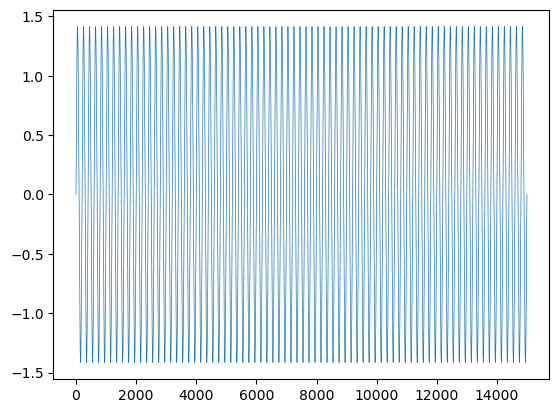

In [4]:
signal = z_transform(x)

plt.plot(t, signal[:, 0], lw=.5)
plt.show()

In [9]:
params = {
    "N": 2000,
    "C": 250,
    "v_r": -60,
    "v_t": -60 + 40 - (-2 / 2.5), # v_t = v_r + 40 - (b / k)
    "k": 2.5,
    "b": -2,
    "v_peak": 30,
    "v_reset": -65,
    "a": 0.01,
    "d": 200,
    "tau_r": 2,
    "tau_d": 20,
    "p": 0.1,
    "g": 5e3,
    "Q": 5e3,
    "I_BIAS": 1000,
    "l": 2,       
}

In [10]:
model = Izhikevich(supervisor=signal, T=T, dt=dt, **params)

In [ ]:
voltage_trace = model.render(rls_start=5000, rls_stop=10000, rls_step=2, n_neurons=10)

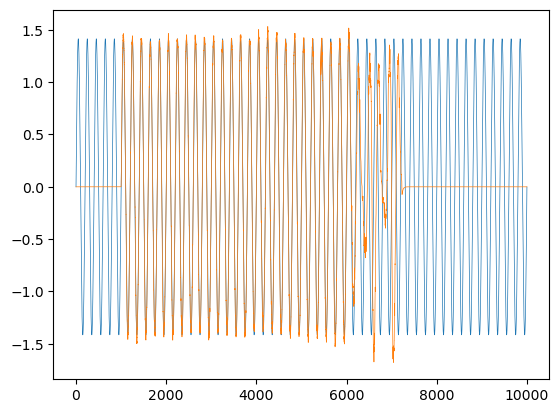

In [6]:
plt.plot(t, signal[:, 0], lw=.5)
plt.plot(t, model.x_hat_rec[:, 0], lw=.5)
plt.show()

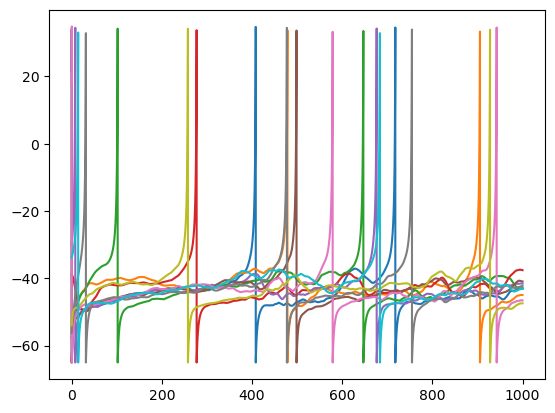

In [21]:
# Pre-learning: pre
rls_start = int(.1*T / dt)
rls_stop = int(.6*T / dt)
diff = int(1000 / dt)
shift = int(3000 / dt)
voltage_pre = voltage_trace[(rls_start-diff):rls_start]
voltage_post = voltage_trace[rls_stop+shift:(shift+rls_stop+diff)]


plt.plot(np.arange(diff) * dt, voltage_pre)
plt.show()

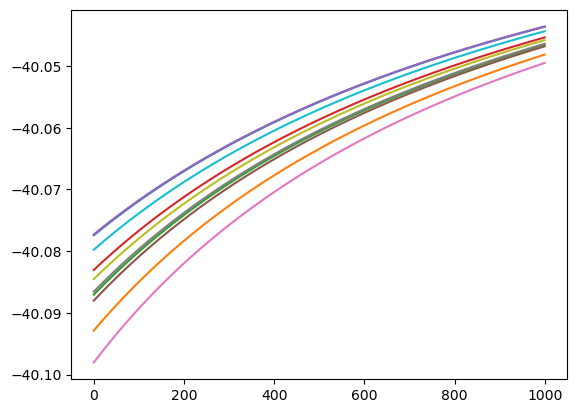

In [22]:
plt.plot(np.arange(diff) * dt, voltage_post)
plt.show()

In [25]:
izh = Izhikevich(supervisor=signal, T=T, dt=dt, N=2000, g=5e3, Q=5e3)

volts = izh.render(rls_start=-1, rls_stop=-1, rls_step=2, n_neurons=10)

100%|██████████| 250000/250000 [00:14<00:00, 17853.20it/s]


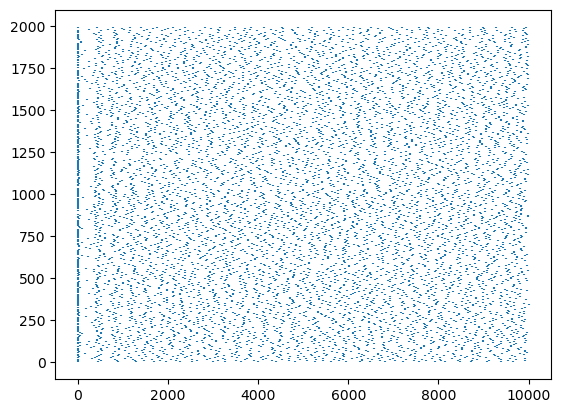

In [26]:
plt.eventplot(izh.tspike)
plt.show()

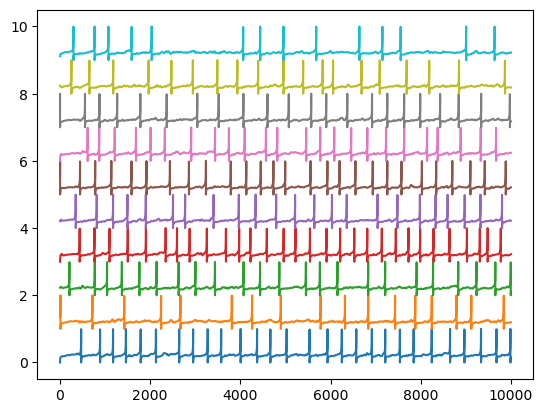

In [34]:
fig = plt.figure(31)
ax = fig.add_subplot()
for i in range(volts.shape[-1]):
    signal = volts[:, i]
    minim = np.min(signal)
    maxim = np.max(signal)
    signal = (signal - minim) / (maxim - minim) + i
    ax.plot(t, signal)

plt.show()